In [15]:
import pandas as pd

data=pd.read_csv('diabetes2.csv',delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
x=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y=data['Outcome'].values
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [17]:
import numpy as np
x_scaled = x - np.mean(x, axis=0)
x = x_scaled / np.std(x_scaled, axis=0)

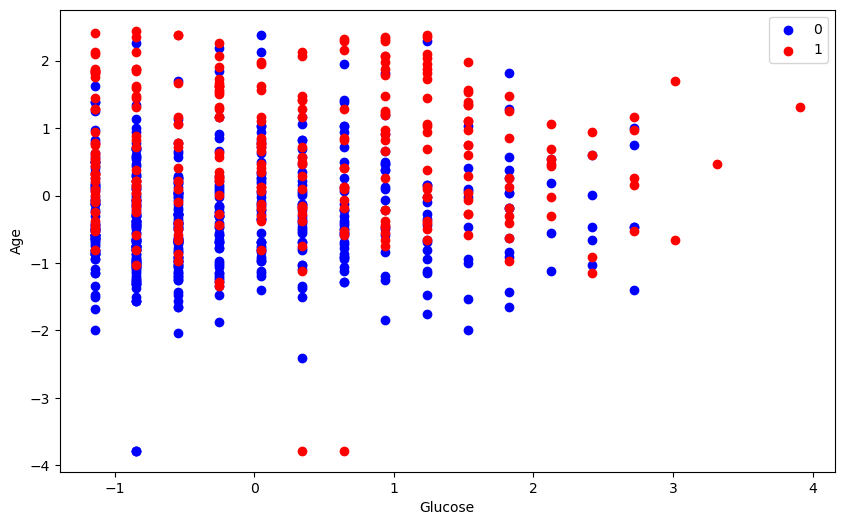

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train))
print(len(x_test))

614
154


In [34]:
from keras.models import Sequential
from keras.layers import Dense

input_dim=x_train.shape[1]
model=Sequential()
model.add(Dense(28,input_dim=input_dim,activation='relu',))
model.add(Dense(28,activation='relu',))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 28)                252       
                                                                 
 dense_16 (Dense)            (None, 28)                812       
                                                                 
 dense_17 (Dense)            (None, 1)                 29        
                                                                 


Total params: 1,093
Trainable params: 1,093
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,epochs=200,verbose=2,batch_size=32,validation_split=0.1)


Epoch 1/200
18/18 - 1s - loss: 0.6714 - accuracy: 0.5906 - val_loss: 0.7182 - val_accuracy: 0.4194 - 923ms/epoch - 51ms/step
Epoch 2/200
18/18 - 0s - loss: 0.6594 - accuracy: 0.6178 - val_loss: 0.7092 - val_accuracy: 0.5323 - 95ms/epoch - 5ms/step
Epoch 3/200
18/18 - 0s - loss: 0.6480 - accuracy: 0.6504 - val_loss: 0.7005 - val_accuracy: 0.5484 - 92ms/epoch - 5ms/step
Epoch 4/200
18/18 - 0s - loss: 0.6379 - accuracy: 0.6558 - val_loss: 0.6931 - val_accuracy: 0.5806 - 94ms/epoch - 5ms/step
Epoch 5/200
18/18 - 0s - loss: 0.6285 - accuracy: 0.6667 - val_loss: 0.6862 - val_accuracy: 0.5968 - 92ms/epoch - 5ms/step
Epoch 6/200
18/18 - 0s - loss: 0.6194 - accuracy: 0.6793 - val_loss: 0.6783 - val_accuracy: 0.5968 - 99ms/epoch - 5ms/step
Epoch 7/200
18/18 - 0s - loss: 0.6109 - accuracy: 0.6848 - val_loss: 0.6705 - val_accuracy: 0.5806 - 91ms/epoch - 5ms/step
Epoch 8/200
18/18 - 0s - loss: 0.6025 - accuracy: 0.6902 - val_loss: 0.6634 - val_accuracy: 0.5806 - 91ms/epoch - 5ms/step
Epoch 9/200
18

In [37]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=2)
print("loss:",loss)
print('accuracy:',accuracy)

5/5 - 0s - loss: 0.5507 - accuracy: 0.7662 - 37ms/epoch - 7ms/step
loss: 0.5507062673568726
accuracy: 0.7662337422370911


In [14]:
# y_perdict=model.predict(x_test,verbose=2)

5/5 - 0s - 39ms/epoch - 8ms/step
